# Plots with beta

In [1]:
import pickle
import sys
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
import os
import pandas as pd
import datetime
import matplotlib.ticker as ticker
sys.path.append("../../")
sys.path.append("../../covid19_inference")
sys.path.append("../")

import covid19_soccer
from covid19_soccer.plot.utils import get_from_trace
import covid19_inference as cov19
from header_plotting import *

In [2]:
%load_ext autoreload
%autoreload 2

In [15]:
def load(fstr):
    with open(fstr, "rb") as f:
         return pickle.load(f)

countries = ['England', 'Scotland', 'Spain', 'Germany', 'Italy', 'Netherlands']
traces, models, dls = [], [], []
for country in tqdm(countries):
    #'UEFA-beta=False-country=England-offset_games=0-draw_delay=True-weighted_alpha_prior=0-prior_delay=-1-width_delay_prior=0.1-sigma_incubation=-1.0-median_width_delay=1.0-tune=200-draws=300-max_treedepth=10.pickled'
    model = None
    fstr=lambda tune, draws, max_treedepth: (f"/data.nst/share/soccer_project/covid_uefa_traces14/run"+
        f"-beta=True"+
        f"-country={country}"+
        f"-offset_data=0"+
        f"-prior_delay=-1"+
        f"-median_width_delay=1.0"+
        f"-interval_cps=10.0"+
        f"-f_fem=0.33"+
        f"-len=normal"+
        f"-abs_sine=False"+
        f"-t={tune}"+
        f"-d={draws}"+
        f"-max_treedepth={max_treedepth}.pkl")
    
    dl = covid19_soccer.dataloader.Dataloader_gender(countries=[country])
    dls.append(dl)
    #print(fstr(4000, 8000, 12))
    if os.path.exists(fstr(4000, 8000, 12)):
        try:
            model, trace = load(fstr(4000, 8000, 12))
            print(f"Use 8000 sample runs for {country}")
        except:
            pass
    if model is None and os.path.exists(fstr(2000, 4000, 12)):
        try:
            model, trace = load(fstr(2000, 4000, 12))
            print(f"Use 4000 sample runs for {country}")
        except:
            pass
    if model is None and os.path.exists(fstr(1000, 1500, 12)):
        try: 
            model, trace = load(fstr(1000, 1500, 12))
            print(f"Use 1500 sample runs for {country}")
        except:
            pass
    if model is None and os.path.exists(fstr(500, 1000, 12)):
        try: 
            model, trace = load(fstr(500, 1000, 12))
            print(f"Use 1500 sample runs for {country}")
        except:
            pass
    if model is None:
        print(country+" not found")
        continue
    
    # Remove chains with likelihood larger than -200, should only be the case for 2 chains in France
    mask = (np.mean(trace.sample_stats.lp, axis=1)>-200)
    trace.posterior = trace.posterior.sel(chain=~mask)
    
    models.append(model)
    traces.append(trace)
    

  0%|          | 0/6 [00:00<?, ?it/s]

INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


Use 4000 sample runs for England


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


Use 1500 sample runs for Scotland


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


Use 4000 sample runs for Spain


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


Use 4000 sample runs for Germany


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


Use 4000 sample runs for Italy


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


Use 4000 sample runs for Netherlands


Country	2.5	50.0	97.5	>0
England0	6.560000210921153	9.304951607260243	13.585149357090614	1.0
Scotland1	-0.07139953308912961	3.4413977114855427	11.839654398112154	0.9715
Spain2	-11.818275856758715	-1.4207440291314186	6.020511691205654	0.40328125
Germany3	-10.679816946203335	1.5139014231424992	13.609209203962672	0.675625
Italy4	-5.9555450699201335	14.495937919444795	29.662191140383666	0.9297175565356104
Netherlands5	-3.9480396598989733	0.6511803274737787	2.7816357675779697	0.64325
Country	2.5	50.0	97.5	>0
England0	-4.046971096310605	-1.259639845185661	1.181540503390197	0.1445
Scotland1	-12.628637157370429	-1.3581075737425987	2.3808727008458246	0.159
Spain2	-0.3238004875432372	3.3880188164731875	7.36305104111698	0.9658125
Germany3	-13.909580129735943	2.5776638649073007	10.228993896449472	0.748
Italy4	-32.82343455292306	-12.217404330474274	5.6917376187120645	0.09947977848632321
Netherlands5	-2.1295852072270725	-0.056451898196820935	4.2181848344296995	0.4845625


/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:930: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_male, lw=0,),)
/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:934: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_female, lw=0,),)


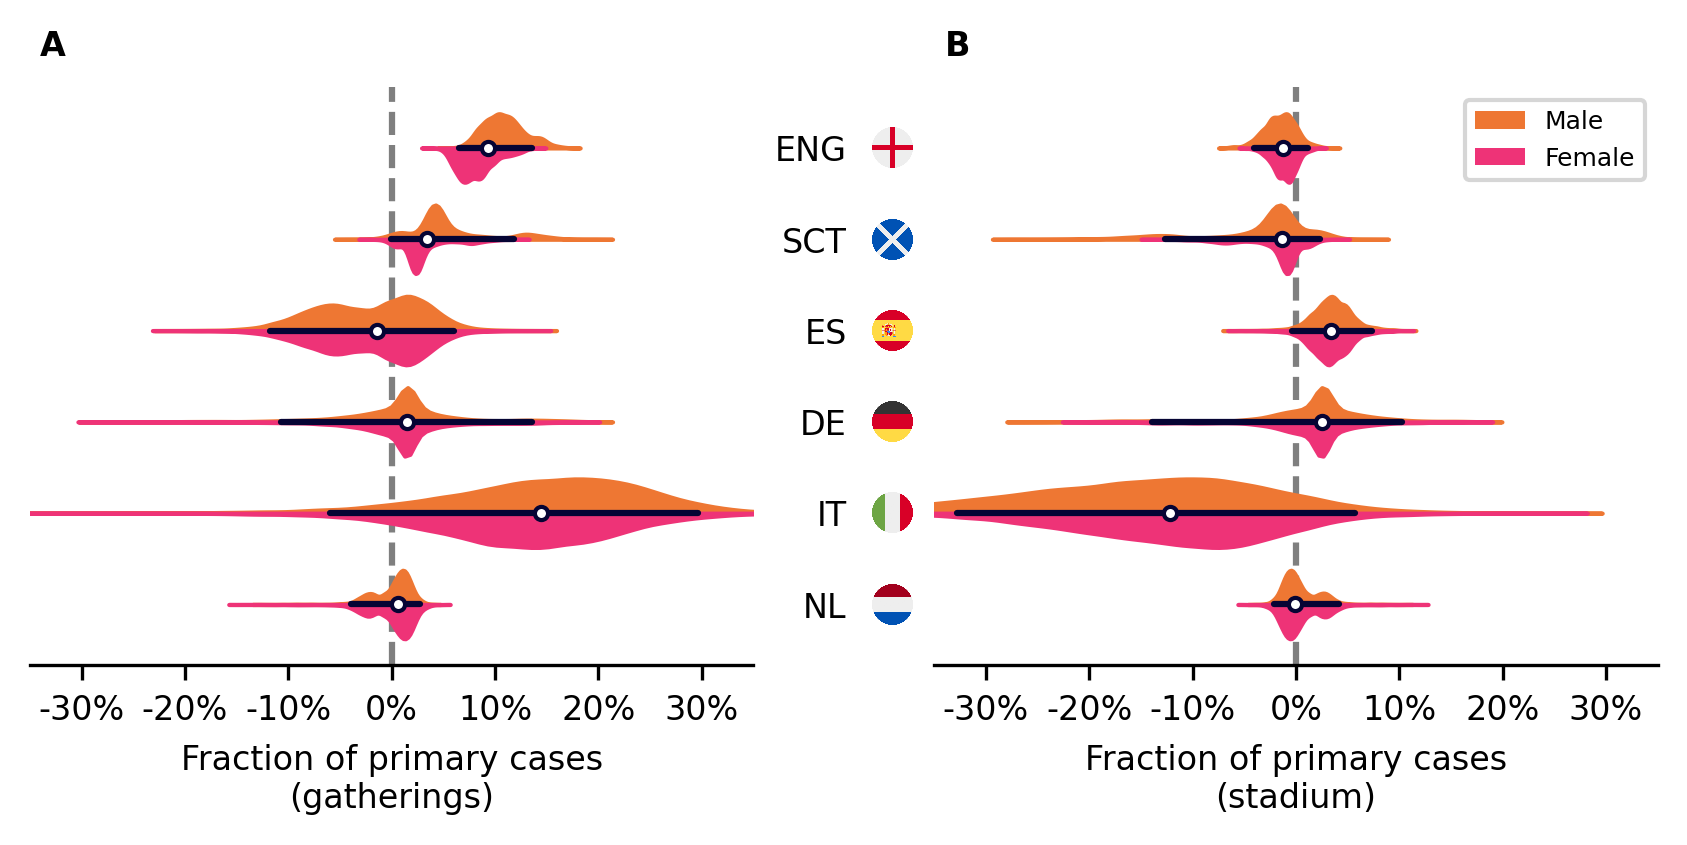

In [57]:
# Plotting
from covid19_soccer.plot.other import soccer_related_cases_overview, legend
import string

fig, axes  = plt.subplots(1, 2,figsize=(7,2.5),gridspec_kw={"wspace":0.25})


soccer_related_cases_overview(
    axes[0],
    traces,
    models,
    dls,
    vertical=True,
    plot_flags=False,
    remove_outliers=True,
    country_order=[0,1,2,3,4,5],
)
axes[0].set_xlim(-35,35)
axes[0].set_xlabel("Fraction of primary cases\n(gatherings)")
axes[0].set(yticklabels=[])
axes[0].tick_params(left=False)

soccer_related_cases_overview(
    axes[1],
    traces,
    models,
    dls,
    plot_betas=True,
    vertical=True,
    plot_flags=True,
    remove_outliers=True,
    ypos_flags=-35,
    country_order=[0,1,2,3,4,5],
)
axes[1].set_xlim(-35,35)
axes[1].set_xlabel("Fraction of primary cases\n(stadium)")
legend(axes[1],
    prior=False,
    posterior=False,
    model=False,
    data=False,
    sex=True,
    disable_axis=False,
    championship_range=False,
    loc=1
)

#Add axes annotations
alphabet_string = list(string.ascii_uppercase)
for i, ax in enumerate(axes):
    letter = alphabet_string[i]
    ax.text(0.05, 1.1, letter, transform=ax.transAxes,
            fontsize=8, fontweight='bold', va='top', ha='right')


plt.show()
fig_path = "../figures/SI"
fig.savefig(f"{fig_path}/beta.pdf", **save_kwargs)
fig.savefig(f"{fig_path}/beta.png", **save_kwargs)
plt.close(fig=fig)